## Exercises Part 1: FTP Optimisation

**Basic Selection**
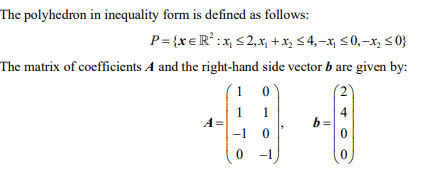
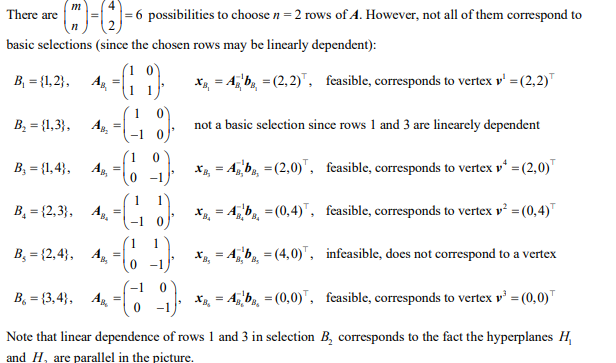$

In [30]:
import sympy as sp
from itertools import combinations
from IPython.display import display, Latex


# Correct the definition of A and b
A_corrected = sp.Matrix([[1, 0], [1, 1], [-1, 0], [0, -1]])
b_corrected = sp.Matrix([2, 4, 0, 0])

# Number of variables and constraints
n = 2 # Variables
k = 4 # Constraints

# Correct calculation for number of possible bases (4 choose 2)
nCk_corrected = sp.binomial(k, n)
# Correcting the LaTeX expression and displaying it
display(Latex(r"There are: $\binom{{4}}{{2}} = {}$ possibilities to choose n ={} rows of $A$".format(nCk_corrected, n)))

# Calculate all possible basic selections 
# It is alwas
# Generate all combinations of selecting 2 rows out of 4
row_combinations = list(combinations(range(k), n))

# Calculate the basic selection matrices
matrices = [A_corrected[[i, j], :] for i, j in row_combinations]
inv_matrices = []
for matrix in matrices:
    try:
        inv_matrices.append(matrix.inv())
    except:
        inv_matrices.append(None)

# Calculate \boldsymbol{x}_{B} for each basic selection
x_B = []
for idx, (i, j) in enumerate(row_combinations):
    if inv_matrices[idx] is not None:
        x_B.append(inv_matrices[idx] * b_corrected[[i, j], :])
    else:
        x_B.append(None)


basic_selections_latex = []
for idx, (i, j) in enumerate(row_combinations):
    if x_B[idx] is not None:
        basic_selections_latex.append(
            r' We have B=$({},{})$: $A_B$ = {}, $x_B=A_B^-1 b_B$ = {}'.format(
                i+1, j+1, 
                ', '.join(map(str, A_corrected[[i, j], :])),
                ', '.join(map(str, x_B[idx]))
            )
        )
    else:
        basic_selections_latex.append(
            r' We have B=$({},{})$: $A_B$ = {}, $x_B=A_B^-1 b_B$ is not invertible'.format(
                i+1, j+1, 
                ', '.join(map(str, A_corrected[[i, j], :]))
            )
        )

# Display the basic selections
for selection in basic_selections_latex:
    display(Latex(selection))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>